In [86]:
from IPython.display import display, HTML
display(HTML ("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. 데이터 생성
- 남,여 키와 몸무게 데이터를 군집화

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.randint(140, 195)

169

In [8]:
data=[]
for i in range(50):
    # 여자 데이터 data추가
    data.append([random.randint(40, 70), random.randint(140, 175)])
    # 남자 데이터 data추가
    data.append([random.randint(55, 95), random.randint(160, 195)])
#data

In [12]:
# 여자
# for female in data[::2]:
#     print(female, end=' ')
print('여자 :', [female for female in data [::2]])
print('남자 :', [male for male in data [1::2]])
print('====================================================')
print('여자 몸무게(x축) :', [female[0] for female in data [::2]])
print('여자 키(y축) :', [female[1] for female in data [::2]])

print('남자 몸무게(x축) :', [male[0] for male in data [1::2]])
print('남자 키(y축):', [male[1] for male in data [1::2]])

여자 : [[55, 167], [65, 154], [40, 171], [63, 141], [62, 148], [64, 175], [54, 157], [55, 175], [62, 159], [65, 145], [43, 148], [56, 170], [45, 144], [57, 160], [68, 162], [40, 144], [42, 153], [40, 169], [66, 165], [69, 172], [55, 160], [61, 144], [42, 159], [42, 144], [64, 160], [40, 173], [56, 152], [56, 174], [70, 175], [47, 158], [63, 166], [59, 162], [44, 149], [67, 142], [61, 174], [49, 168], [62, 162], [66, 146], [63, 156], [45, 152], [53, 160], [55, 140], [46, 141], [63, 175], [46, 163], [52, 164], [65, 145], [58, 145], [70, 140], [40, 143]]
남자 : [[59, 195], [71, 179], [91, 174], [85, 172], [74, 179], [60, 181], [58, 183], [56, 177], [60, 183], [69, 172], [63, 165], [62, 182], [62, 172], [61, 188], [95, 183], [78, 179], [89, 190], [75, 191], [72, 176], [57, 176], [56, 194], [56, 180], [57, 163], [72, 191], [77, 165], [71, 165], [59, 181], [60, 165], [66, 189], [70, 182], [57, 166], [77, 184], [84, 177], [65, 161], [94, 169], [68, 187], [74, 176], [59, 193], [92, 164], [95, 193]

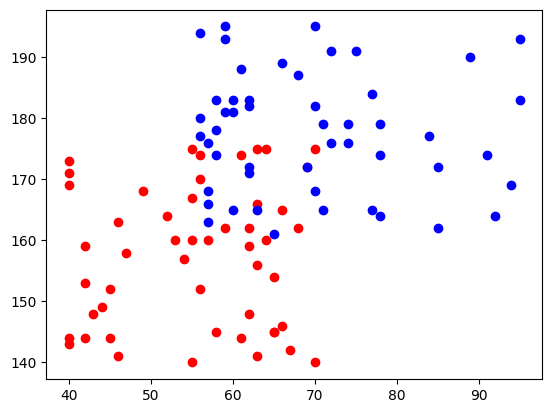

In [16]:
plt.plot([female[0] for female in data [::2]],
         [female[1] for female in data [::2]], 'o', c='r')
plt.plot([male[0] for male in data [1::2]],
         [male[1] for male in data [1::2]], 'o', c='b')
plt.show()

# 2. 군집화 로직

In [17]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)]
]
random_points

[[89, 195], [65, 172]]

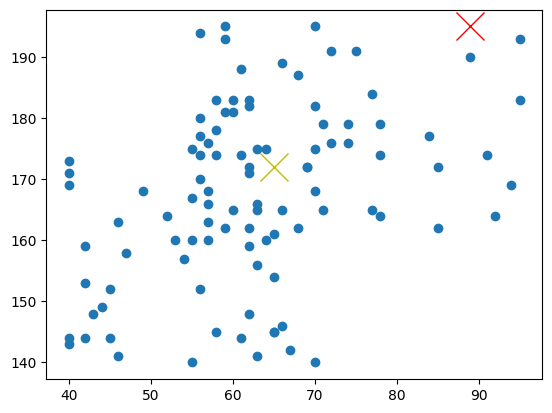

In [23]:
plt.plot([d[0] for d in data],
        [d[1] for d in data], 'o')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', c='r', markersize=20) # 기준점1(random_points[0])
plt.plot(random_points[1][0],
        random_points[1][1], 'x', c='y', markersize=20) # 기준점2(random_points[1])

In [26]:
# 두 점 거리를 return a : [0,0]
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
print(dist([0,0], [3,4]))
print(dist(random_points[0], data[0]))
print(dist(random_points[1], data[0]))

5.0
44.04543109109048
11.180339887498949


In [28]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(10, 90)

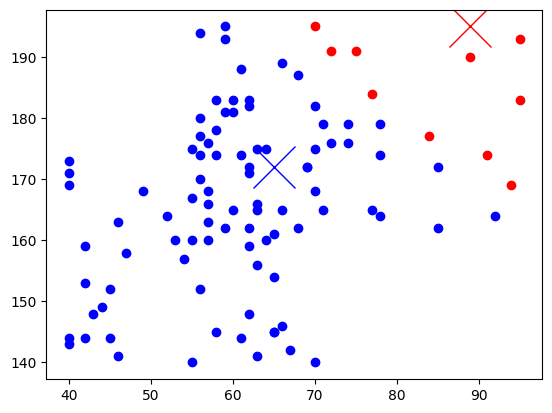

In [33]:
# group0과 gropu1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
        [d[1] for d in group0], 'o', c='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', c='r', markersize=30)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', c='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', c='b', markersize=30)

In [48]:
# 기준점 이동 : group0의 중심점(기준점0), gropu1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[84.2, 184.7], [60.144444444444446, 165.5888888888889]]

In [38]:
[d[0] for d in group0]

[91, 95, 89, 75, 72, 77, 84, 94, 95, 70]

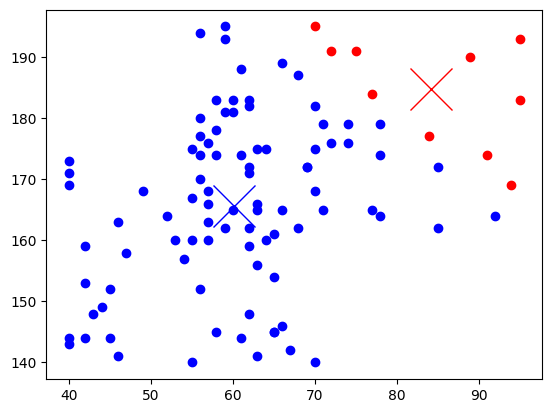

In [49]:
plt.plot([d[0] for d in group0],
        [d[1] for d in group0], 'o', c='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', c='r', markersize=30)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', c='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', c='b', markersize=30)
plt.show()

# 3. 군집화 전체 코드(for문 이용)
- 랜덤포인트 2개 지정
- 랜덤포인트 2개 출력과 시각화(x)
- for문
    * 랜덤포인트 2지점 기준으로 group0과 group1나눔
    * group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트
    * 랜덤포인트 출력

초기 기준점 : [[48, 175], [48, 166]]
1 번째 points: [[66.8695652173913, 180.3913043478261], [58.870370370370374, 156.5185185185185]]
2 번째 points: [[69.84, 178.92], [55.26, 156.08]]
3 번째 points: [[69.86274509803921, 178.64705882352942], [54.93877551020408, 155.89795918367346]]
4 번째 points: [[69.78846153846153, 178.3846153846154], [54.708333333333336, 155.70833333333334]]
5 번째 points: [[69.78846153846153, 178.3846153846154], [54.708333333333336, 155.70833333333334]]
6 번째 points: [[69.78846153846153, 178.3846153846154], [54.708333333333336, 155.70833333333334]]
7 번째 points: [[69.78846153846153, 178.3846153846154], [54.708333333333336, 155.70833333333334]]
8 번째 points: [[69.78846153846153, 178.3846153846154], [54.708333333333336, 155.70833333333334]]
9 번째 points: [[69.78846153846153, 178.3846153846154], [54.708333333333336, 155.70833333333334]]


(140.0, 195.0)

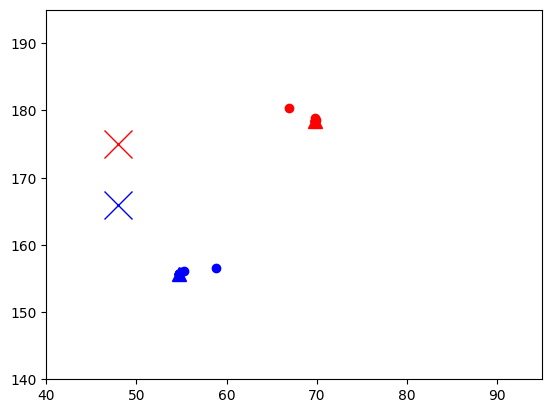

In [71]:
points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140, 195)]
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', c='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', c='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0=[]
    group1=[]
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X=np.mean([d[0] for d in group0])
    group0_mean_Y=np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X=np.mean([d[0] for d in group1])
    group1_mean_Y=np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    #포인트 출력
    print(i, '번째 points:', points)
    plt.plot(points[0][0], points[0][1], 'o', c='r')
    plt.plot(points[1][0], points[1][1], 'o', c='b')
plt.plot(points[0][0], points[0][1], '^', c='r', markersize=10)
plt.plot(points[1][0], points[1][1], '^', c='b', markersize=10)
plt.xlim([40, 95])
plt.ylim([140, 195])

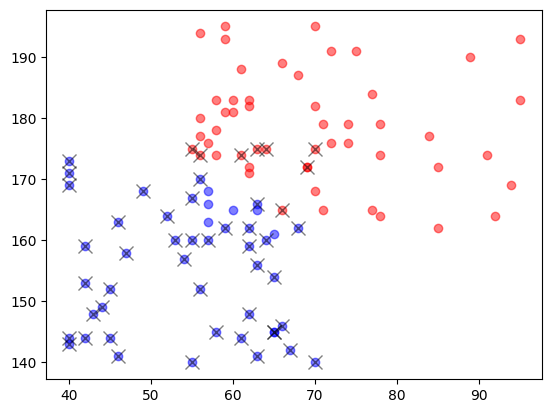

In [73]:
plt.plot([d[0] for d in group0],
        [d[1] for d in group0], 'o', c='r', alpha=0.5)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', c='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]], 'x', c='k', alpha=0.5, markersize=10)

# 4. api(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    * 예측모델 : 분류, 회귀, 군집분석 - fit(학습), predict(예측)
    * 변환모델 : 전처리시 사용 ex. 스케일조정 - fit(학습), transform(변환함수), fit_transform(학->변)

In [ ]:
# 군집분석 라이브러리가 경고 메세지 출력할 경우
# import os
# os.environ['OMP_NUM_THREADS']='1'

In [79]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집
              init='random', # 초기 기준점을 random하게
              n_init=10, # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [80]:
# 기준점(중심점)
model.cluster_centers_

array([[ 69.78846154, 178.38461538],
       [ 54.70833333, 155.70833333]])

In [81]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [82]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

array([[ 59, 195],
       [ 71, 179],
       [ 91, 174],
       [ 85, 172],
       [ 74, 179],
       [ 64, 175],
       [ 60, 181],
       [ 58, 183],
       [ 55, 175],
       [ 56, 177],
       [ 60, 183],
       [ 69, 172],
       [ 62, 182],
       [ 62, 172],
       [ 61, 188],
       [ 95, 183],
       [ 78, 179],
       [ 89, 190],
       [ 75, 191],
       [ 66, 165],
       [ 72, 176],
       [ 69, 172],
       [ 57, 176],
       [ 56, 194],
       [ 56, 180],
       [ 72, 191],
       [ 77, 165],
       [ 71, 165],
       [ 59, 181],
       [ 56, 174],
       [ 70, 175],
       [ 66, 189],
       [ 70, 182],
       [ 77, 184],
       [ 84, 177],
       [ 61, 174],
       [ 94, 169],
       [ 68, 187],
       [ 74, 176],
       [ 59, 193],
       [ 92, 164],
       [ 95, 193],
       [ 58, 178],
       [ 62, 171],
       [ 70, 168],
       [ 63, 175],
       [ 70, 195],
       [ 78, 174],
       [ 78, 164],
       [ 85, 162],
       [ 62, 183],
       [ 58, 174]])

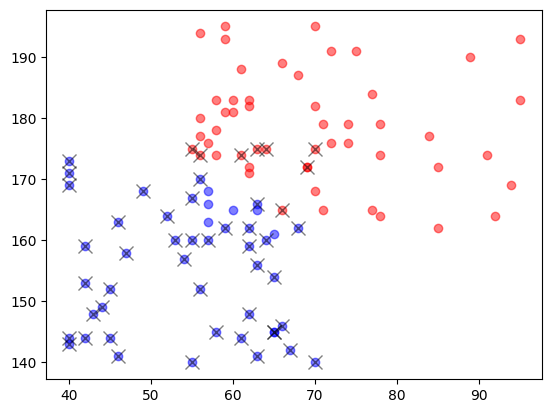

In [83]:
plt.plot([d[0] for d in group0],
        [d[1] for d in group0], 'o', c='r', alpha=0.5)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', c='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]], 'x', c='k', alpha=0.5, markersize=10)

In [84]:
model = KMeans(n_clusters=2, # 2개 그룹으로 군집
              init='random', # 초기 기준점을 random하게
              n_init=10, # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)